In [12]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-08,277.799988,283.959991,270.000000,275.850006,273.170105,48159500
1,2022-03-09,283.440002,289.600006,280.779999,288.500000,285.697205,35204500
2,2022-03-10,283.019989,286.600006,280.579987,285.589996,282.815491,30628000
3,2022-03-11,287.959991,289.510010,279.429993,280.070007,277.349091,27209300
4,2022-03-14,280.339996,285.399994,275.820007,276.440002,273.754395,30660700
...,...,...,...,...,...,...,...
247,2023-03-02,246.550003,251.399994,245.610001,251.110001,251.110001,24808200
248,2023-03-03,252.190002,255.619995,251.389999,255.289993,255.289993,30741300
249,2023-03-06,256.429993,260.119995,255.979996,256.869995,256.869995,24109800
250,2023-03-07,256.299988,257.690002,253.389999,254.149994,254.149994,21473200


In [15]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2022-03-08,275.850006
1,2022-03-09,288.500000
2,2022-03-10,285.589996
3,2022-03-11,280.070007
4,2022-03-14,276.440002
...,...,...
247,2023-03-02,251.110001
248,2023-03-03,255.289993
249,2023-03-06,256.869995
250,2023-03-07,254.149994


In [16]:
df['Date']

0      2022-03-08
1      2022-03-09
2      2022-03-10
3      2022-03-11
4      2022-03-14
          ...    
247    2023-03-02
248    2023-03-03
249    2023-03-06
250    2023-03-07
251    2023-03-08
Name: Date, Length: 252, dtype: object

In [17]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [18]:
df

,Date,Close
0,2022-03-08,275.850006
1,2022-03-09,288.500000
2,2022-03-10,285.589996
3,2022-03-11,280.070007
4,2022-03-14,276.440002
...,...,...
247,2023-03-02,251.110001
248,2023-03-03,255.289993
249,2023-03-06,256.869995
250,2023-03-07,254.149994


In [20]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

/var/folders/d3/ctwg6z0d7vx6q83fy8vgjyc00000gn/T/ipykernel_9430/2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2022-03-08
1     2022-03-09
2     2022-03-10
3     2022-03-11
4     2022-03-14
         ...    
247   2023-03-02
248   2023-03-03
249   2023-03-06
250   2023-03-07
251   2023-03-08
Name: Date, Length: 252, dtype: datetime64[ns]

In [21]:
df.index = df.pop('Date')
df

,Close
Date,
2022-03-08,275.850006
2022-03-09,288.500000
2022-03-10,285.589996
2022-03-11,280.070007
2022-03-14,276.440002
...,...
2023-03-02,251.110001
2023-03-03,255.289993
2023-03-06,256.869995


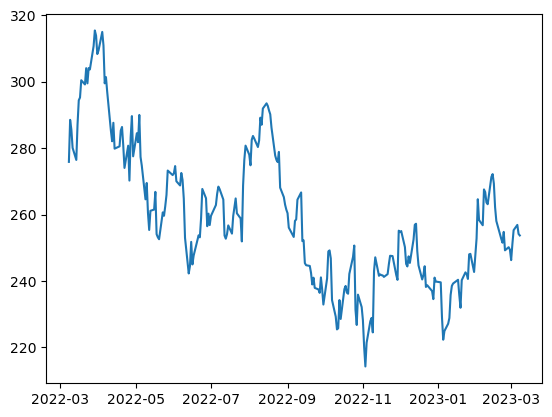

In [22]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [23]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2022-08-25', 
                                '2023-03-01', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-08-25,277.750000,276.440002,275.790009,278.850006
1,2022-08-26,276.440002,275.790009,278.850006,268.089996
2,2022-08-29,275.790009,278.850006,268.089996,265.230011
3,2022-08-30,278.850006,268.089996,265.230011,262.970001
4,2022-08-31,268.089996,265.230011,262.970001,261.470001
...,...,...,...,...,...
124,2023-02-23,258.059998,252.669998,251.509995,254.770004
125,2023-02-24,252.669998,251.509995,254.770004,249.220001
126,2023-02-27,251.509995,254.770004,249.220001,250.160004
127,2023-02-28,254.770004,249.220001,250.160004,249.419998


In [27]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((129,), (129, 3, 1), (129,))

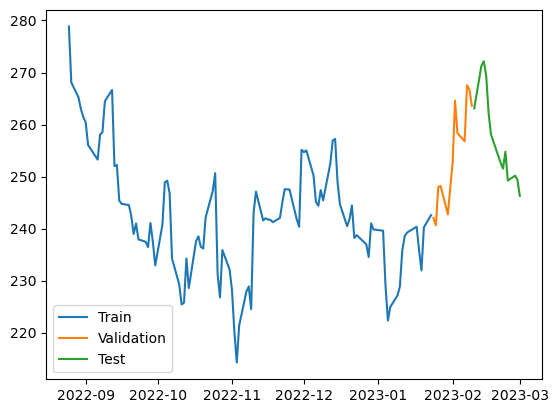

In [28]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [29]:
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-04-10 02:54:17.354315: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-10 02:54:17.354414: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/1000


2023-04-10 02:54:18.464406: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-10 02:54:19.185075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-10 02:54:19.377487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-10 02:54:21.625952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - ETA: 0s - loss: 58763.3398 - mean_absolute_error: 242.1433 

2023-04-10 02:54:23.318314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-10 02:54:23.382407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 5s 420ms/step - loss: 58763.3398 - mean_absolute_error: 242.1433 - val_loss: 64465.1641 - val_mean_absolute_error: 253.7276
Epoch 2/1000
4/4 [==============================] - 0s 26ms/step - loss: 58655.0977 - mean_absolute_error: 241.9199 - val_loss: 64354.5078 - val_mean_absolute_error: 253.5095
Epoch 3/1000
4/4 [==============================] - 0s 19ms/step - loss: 58549.0039 - mean_absolute_error: 241.7002 - val_loss: 64239.8281 - val_mean_absolute_error: 253.2832
Epoch 4/1000
4/4 [==============================] - 0s 18ms/step - loss: 58436.5781 - mean_absolute_error: 241.4677 - val_loss: 64113.5273 - val_mean_absolute_error: 253.0338
Epoch 5/1000
4/4 [==============================] - 0s 18ms/step - loss: 58312.8242 - mean_absolute_error: 241.2117 - val_loss: 63977.4414 - val_mean_absolute_error: 252.7647
Epoch 6/1000
4/4 [==============================] - 0s 18ms/step - loss: 58178.2656 - mean_absolute_error: 240.9319 - val_loss: 63821.914

4/4 [==============================] - 0s 11ms/step


2023-04-10 02:55:42.893597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-10 02:55:42.948629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


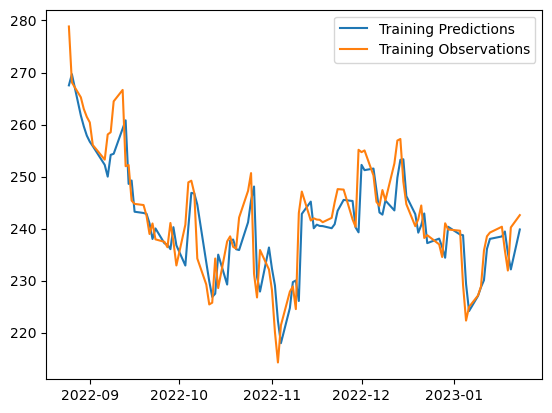

In [30]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 32ms/step


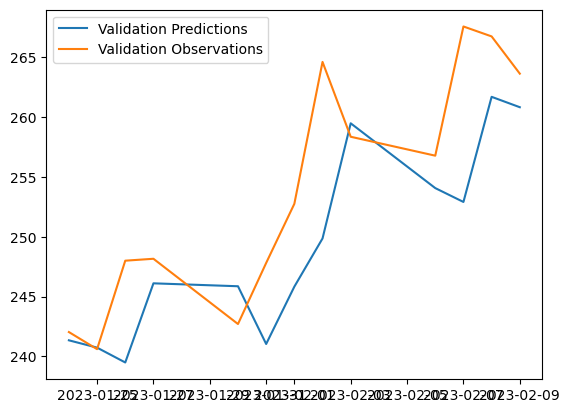

In [31]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 17ms/step


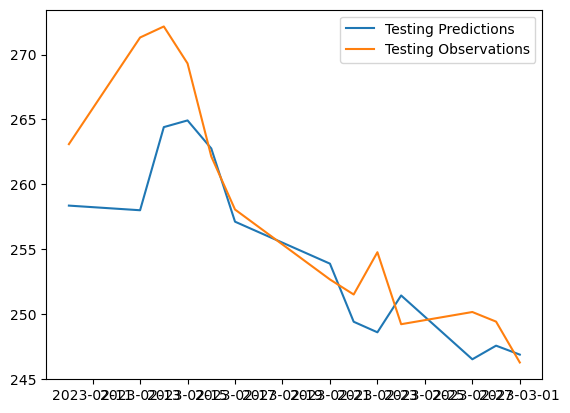

In [32]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

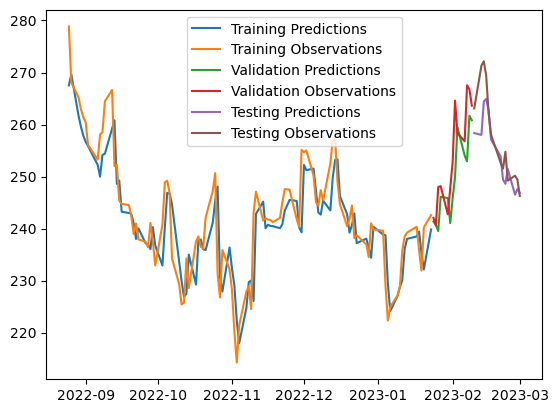

In [33]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [34]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 13ms/step


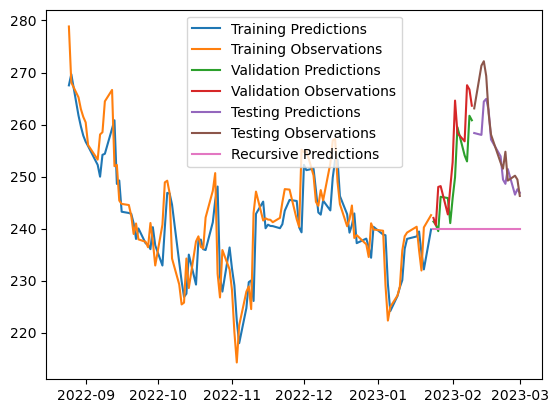

In [35]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])